<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
from keras import backend as K
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam


## Loading the dataset

In [ ]:
# Mounting Google Drive to access file
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

# Defining the path to your CSV file
csv_path = '/content/drive/MyDrive/Churn.csv'

# Loading CSV file
import pandas as pd
df = pd.read_csv(csv_path)

Mounted at /content/drive


## Data Overview

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


*   In reviewing unique values, we can notice some potential areas where dummies may be useful. In addition, RowNumber & CustomerId probably don't add any value.
*   Also, Surname seems like it may have value, but we can use intuitive thinking that it is not unlikely that individual customers have the same last name. This would only add to the confusion later on. So, it may be best to drop all 3 of these columns

.

In [ ]:
unique_values_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

for column in unique_values_columns:
    print(f"Column: {column}")
    print(df[column].unique())

Column: Geography
['France' 'Spain' 'Germany']
Column: Gender
['Female' 'Male']
Column: NumOfProducts
[1 3 2 4]
Column: HasCrCard
[1 0]
Column: IsActiveMember
[1 0]
Column: Exited
[1 0]


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

It appears that we do not have any null values, which is good.

  ## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# Summary statistics for numerical variables
numerical_variables = ['CreditScore', 'Age', 'Balance']
print(df[numerical_variables].describe())

        CreditScore           Age        Balance
count  10000.000000  10000.000000   10000.000000
mean     650.528800     38.921800   76485.889288
std       96.653299     10.487806   62397.405202
min      350.000000     18.000000       0.000000
25%      584.000000     32.000000       0.000000
50%      652.000000     37.000000   97198.540000
75%      718.000000     44.000000  127644.240000
max      850.000000     92.000000  250898.090000


Some basic demographics about the sample population:

*   Median credit score is 652, which is a little lower than the approximate average of about 715 in the United States, but this is not necessarily a great comparison because we are working with France, Spain, and Germany. However, a measuring stick against a 'competing' economy can potentially be useful.
    - note, this is also close to the mean, which helps to indicate that the distribution is likely normal
*   The median age is is 37 and mean age is 38.9, most of the data in the 'middle aged group of 32-44 years old
    - an interesting note is that there does not appear to be any youth with accounts, all the samples are adults. Could be missing an opportunity to capitalize on younger workers and investiments in children/teen accounts.
*   Median balance is quite high, at around $97k. The minimum being 0 and the maximum is about 250k. Based on the difference in the mean and median, the data looks like it will be skewed towards a less balance than the median.







In [ ]:
# Summary statistics for 'EstimatedSalary'
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


*   Fairly wide range in salary, but nothing is unusually high (or low for that matter. Some people may have trouble making ends meet). Considering it is an estimation, these numbers are not exact and probably not extremely helpful unfortunately. We will keep them, but I think it would be much more useful if salary was tracked. Salary 'should' mimic the larger population, and would likely show that there are some individuals that could potentially bring in more money to the bank through investiments, etc.



In [ ]:
# Frequency counts for 'Existed'
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64


*   Individuals who have exited are quite high, but still a minority. We may be required to consider this difference when building models.



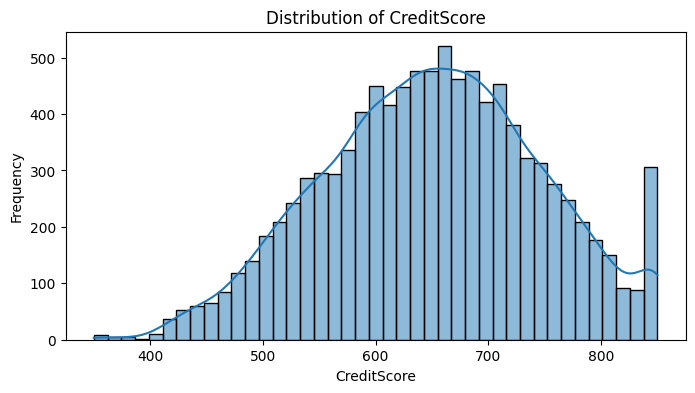

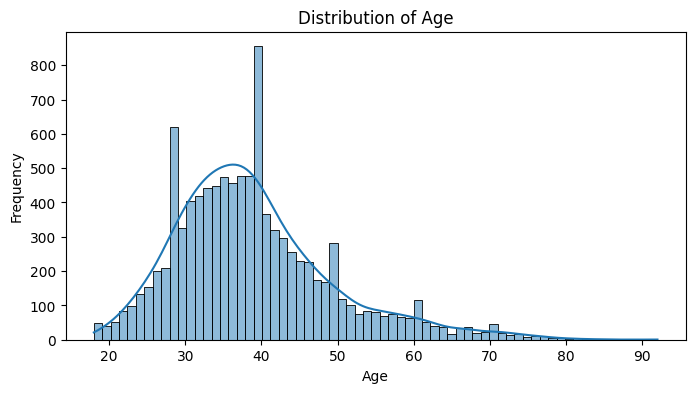

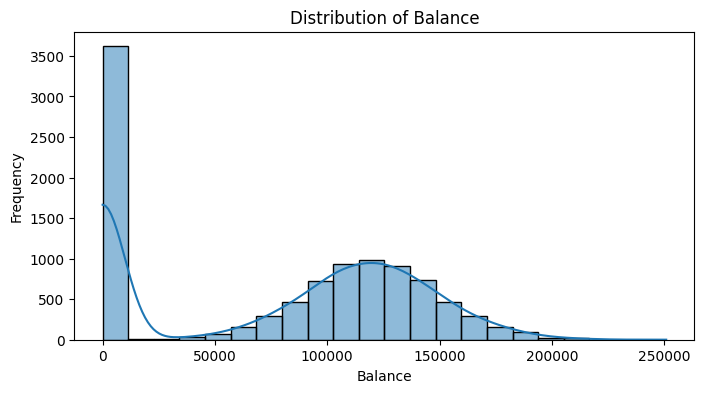

In [ ]:
# Histograms for numerical variables
for column in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

CreditScore Distribution:

* The credit score distribution indicates a diverse range of a customer base in terms of fiancial reliability. An uptick for the 'maximum score' is great to see, as these customers are most reliable at paying their dues and keeping good credit.
* The age histogram illustrates the demographic composition of the banks customers. Interestingly, there are some upticks around 28-29, 38-39 and a smaller peak at 49-50. These concentrations could potentially be targeted for promotions or other benefits to increase investiment.
* The histogram of distribution of balance is a bit concerning. It would be good to drill down into the low to no balance individuals. Different techniques have been employed by banks to 'clean up' these outliers. As in fees for having a balance too low or suspending accounts.
*   If one was to consider all these individuals as 'exited', we would have a bigger problem. However, I would not consider this far from the truth. What is also interesting is that we have very few individuals between 0 and 50000. Again, like the younger community, definitely an area to potentially target.




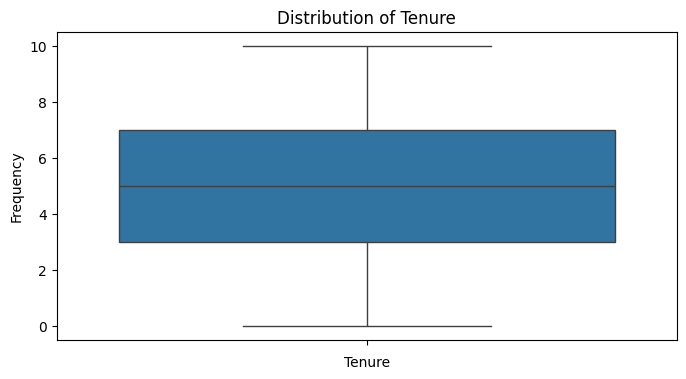

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


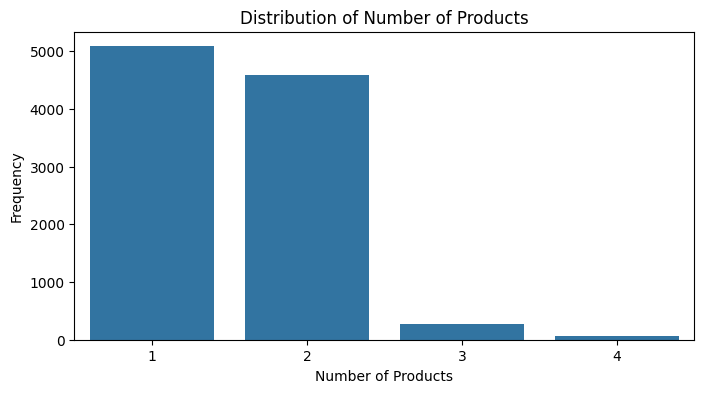

In [ ]:
# Tenure
plt.figure(figsize=(8, 4))
sns.boxplot(df['Tenure'])
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

print(df['Tenure'].describe())

# NumOfProducts
plt.figure(figsize=(8, 4))
sns.countplot(x='NumOfProducts', data=df)
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

*   We have a pretty good concentration in the mid-range tenure customers (mean = 5.01 years). And it makes sense that there are not as many on the high end, because it appears the bank has only been around for about 10 years. New customers likely had trickled in slower.
    - However, we must note that there are very few in the 'new' range 0-3, which means the bank has not accepted many new customers. Definitely an area to focus on and watch.
*   The distribution of products is also interesting considering that the number of products used is skewed towards the lower end. There may be some opportunity for cross-selling or promotion of the additional products.
    - Alternatively, management could look at why these particular products are not satisfying customers.



Frequency count of IsActiveMember:
1    5151
0    4849
Name: IsActiveMember, dtype: int64

Percentage of IsActiveMember:
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64


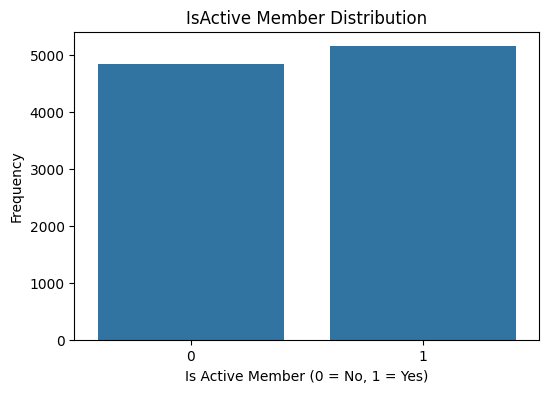

In [ ]:
# IsActiveMember
print("Frequency count of IsActiveMember:")
print(df['IsActiveMember'].value_counts())

# Calculating percentage
print("\nPercentage of IsActiveMember:")
print(df['IsActiveMember'].value_counts(normalize=True) * 100)

# Visualizing IsActiveMember distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='IsActiveMember', data=df)
plt.title('IsActive Member Distribution')
plt.xlabel('Is Active Member (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

*   Fron this chart of Actice we can see that many of the bank members are not active on their account. This could be a concerning metric as a business needs to engage their customers, even a bank, if they want them to continue to utilize their services.




### Bivariate Analysis

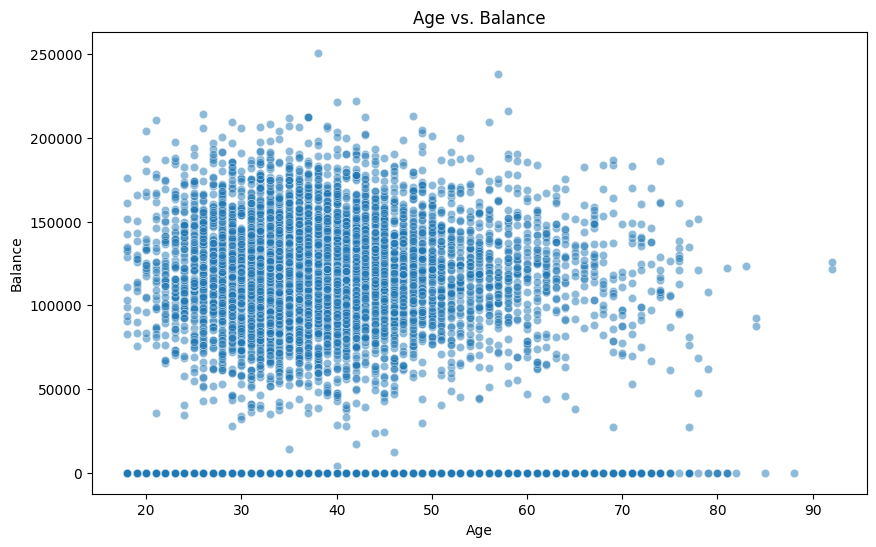

Correlation coefficient between Age and Balance: 0.028308368327491767
  AgeGroup       Balance
0     0-10           NaN
1    11-20  63189.260700
2    21-30  63941.962984
3    31-40  62497.179343
4    41-50  61921.731791
5    51-60  60263.650844
6    61-70  61822.789374
7    71-80  61019.039556
8    81-90  51970.594585
9   91-100   3226.478745
  AgeGroup        Balance
0     0-10            NaN
1    11-20   74393.861633
2    21-30   73677.322902
3    31-40   75071.796781
4    41-50   78479.240768
5    51-60   83632.942486
6    61-70   78058.302667
7    71-80   70416.418235
8    81-90   32730.885385
9   91-100  123794.775000


In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', data=df, alpha=0.5)
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# Calculating and printing correlation coefficient
correlation = df[['Age', 'Balance']].corr().iloc[0, 1]
print(f"Correlation coefficient between Age and Balance: {correlation}")

# We'll create bins for each 10 year age block
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Now, we'll calculate the standard deviation for the balance within each group
age_balance_std_dev = df.groupby('AgeGroup')['Balance'].std().reset_index()

# Now, we'll calculate the standard deviation for the balance within each group
age_balance_mean = df.groupby('AgeGroup')['Balance'].mean().reset_index()

print(age_balance_std_dev)
print(age_balance_mean)

- Age vs. balance does not appear to be informative at first look, but what can be said is that there is a wide range of incomes no matter the age group. In addition, there is no major trend up or down that is noticable.

- By placing each decade group into bins.. We can see it isn't until individuals are older (>80) that we see trends up or down. However, in this range, there are quite a few less data points. More data would be needed to consider any circumstantial evidence

Correlation coefficient between Age and Balance: 0.028308368327491767


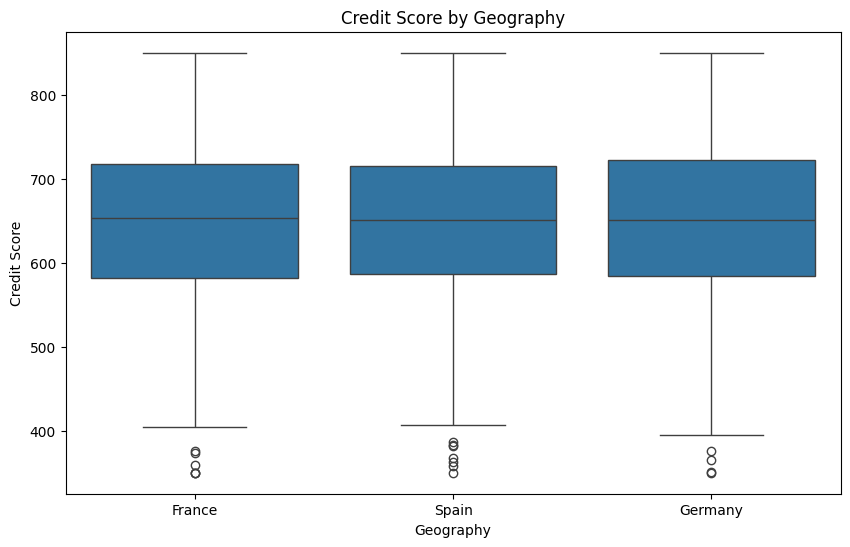

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Geography', y='CreditScore', data=df)
plt.title('Credit Score by Geography')
plt.xlabel('Geography')
plt.ylabel('Credit Score')
plt.show()

- Credit score appears to be pretty even between the countries.

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000


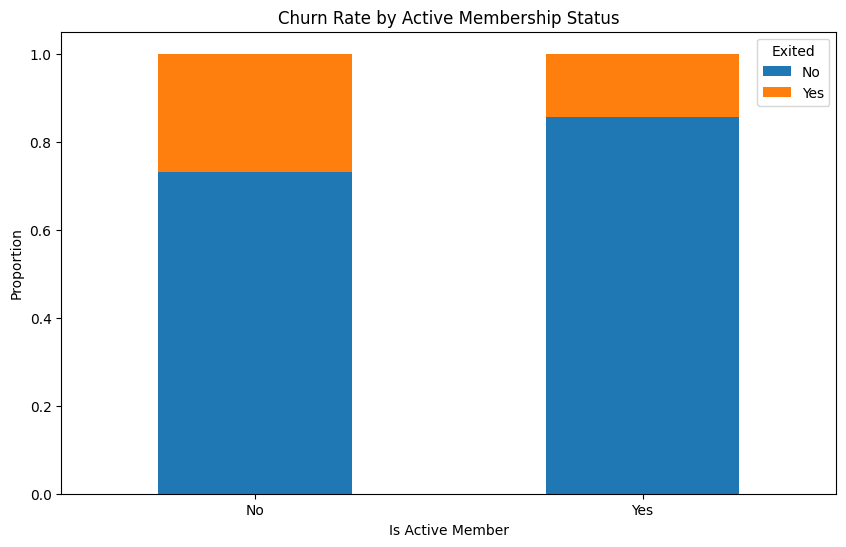

In [ ]:
# Cross-tabulation
ctab = pd.crosstab(df['IsActiveMember'], df['Exited'], margins=True)
print(ctab)

# Visualization with a stacked bar chart
ctab_relative = ctab.div(ctab['All'], axis=0)[:-1]  # Exclude the 'All' row for relative frequencies
ctab_relative.drop(columns='All', inplace=True)  # Exclude the 'All' column
ctab_relative.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Rate by Active Membership Status')
plt.xlabel('Is Active Member')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


- More inactive members are leaving the bank, which is expected. Capturing the active members should be a primary objective group.

<ipython-input-25-0f1d606e419a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='plasma',annot=True);


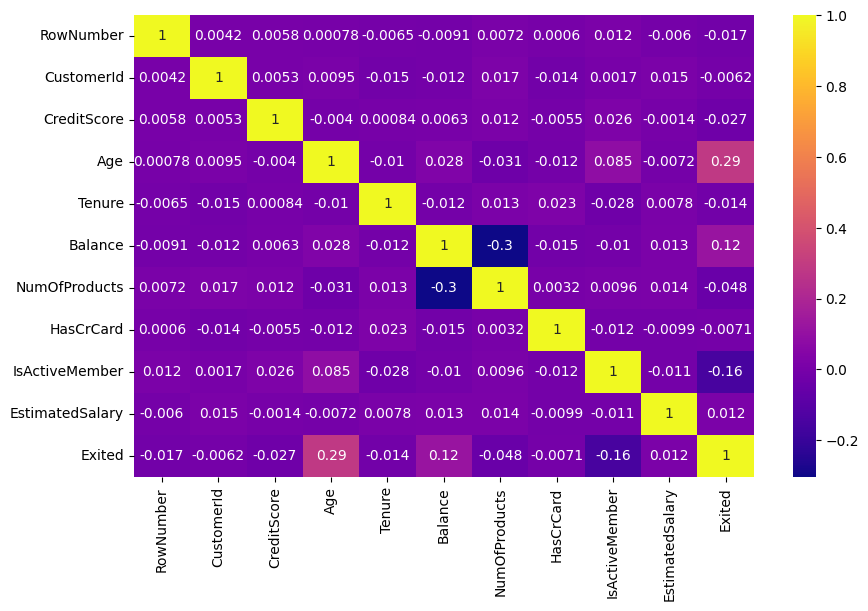

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='plasma',annot=True);

- **Age and Exited:** There is a moderate, positive correlation (approx. 0.29) suggesting that as age increases, the likelihood of exiting increases as well.
- **Balance and NumOfProducts:** There is a moderate, negative correlation (approximately -0.3) indicating that customers with more products tend to have lower balances, or vice versa.
- **IsActiveMember and Exited:** There is a moderate, negative correlation (approximately -0.16), suggesting that active members are less likely to exit.

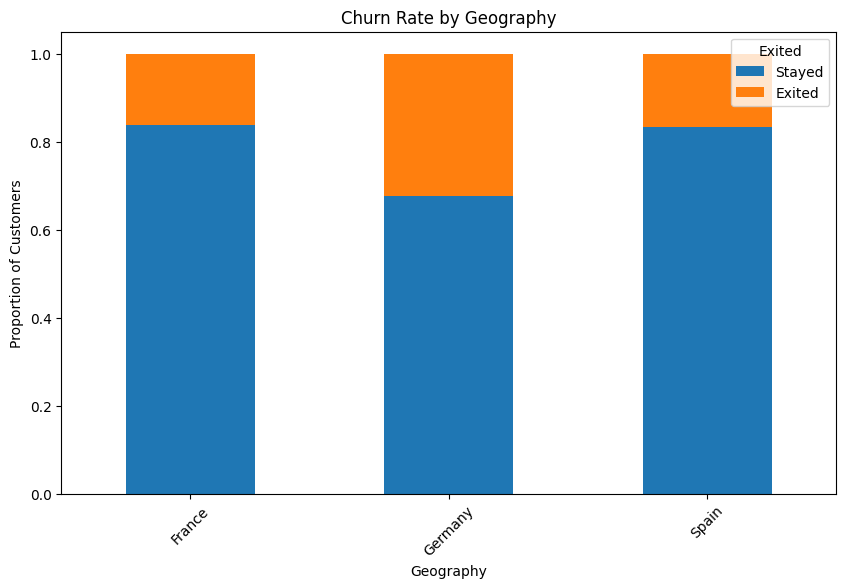

In [ ]:
# Cross-tabulation
geography_exited_ctab = pd.crosstab(df['Geography'], df['Exited'], normalize='index')

# Visualization with a stacked bar chart
geography_exited_ctab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=45)
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.show()

- Interestingly, there tends to be more customers leaving from Germany. May be good information to determine if marketing or services are different.

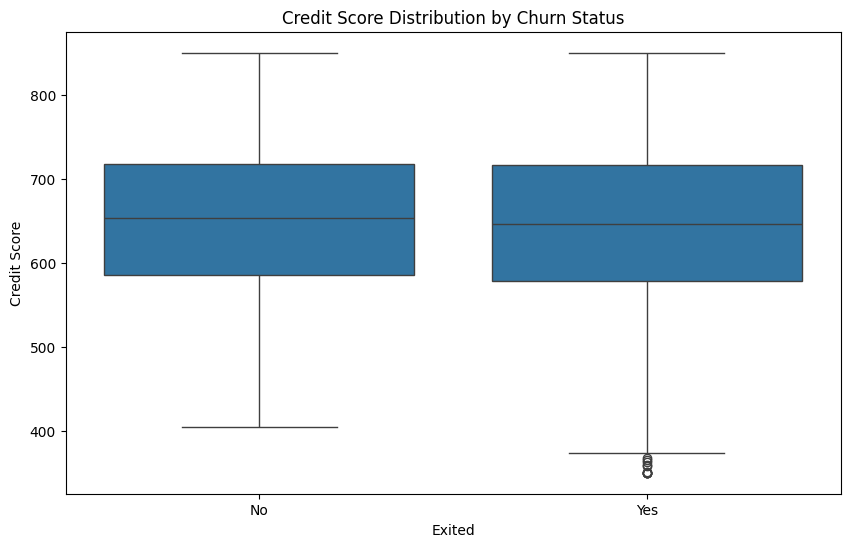

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- No significant difference between those who have exited and credit score

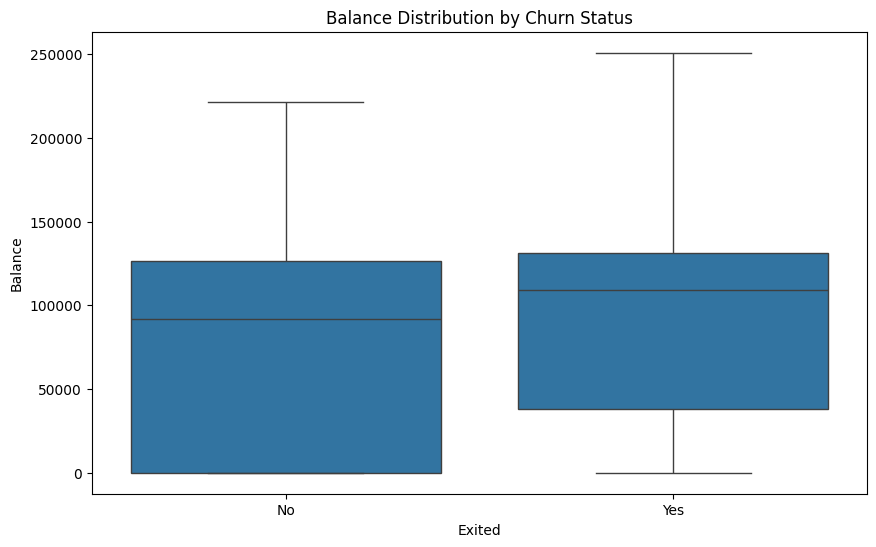

In [ ]:
# Box plot for Balance by Exited status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- It appears that there is a wider range (balance) of individuals who are staying, but more of those who are not exiting tend to be the customers with low to no balance. The means, however, are not significantly different visually.

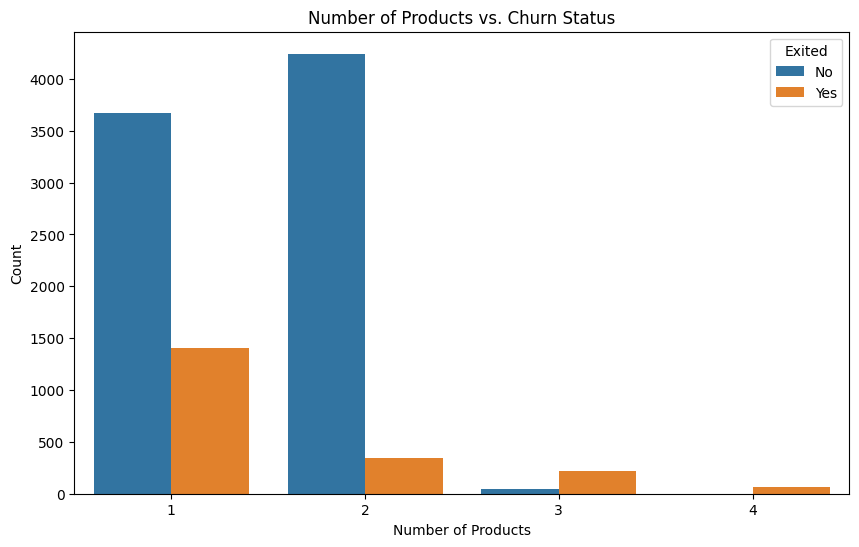

In [ ]:
# Count plot for NumOfProducts by Exited status
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Number of Products vs. Churn Status')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


- It seems that those who use **2** products are less likely to exit compared to other groups. Those who use more than 2 products tend to exit. This may be an indicator that two of the products are not very useful or have a specfic issue. This business appears to be small, but could be low hanging fruit and it should be recognized.

- The information in this chart is very telling. Marketing the two highest used products and improving the others may reduce chance of customers exiting.

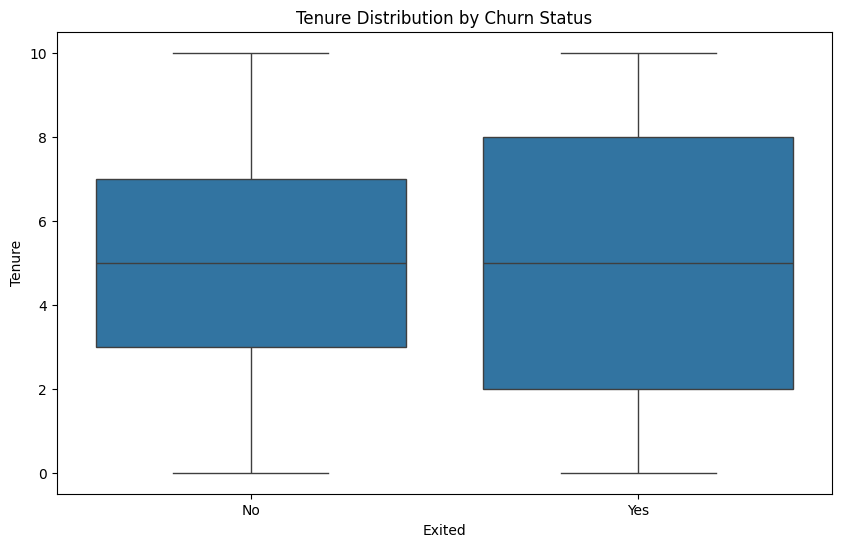

In [ ]:
# Box plot for Tenure by Exited status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Tenure')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Those who exit have more diverse tenure. But overall, there are no major differents.

## Data Preprocessing

### Removing Unneccessary Features

In [ ]:
# Dropping unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Train-validation-test Split

In [ ]:
# Setting up variables
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
#Initial model split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

# Second split to separate out the validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(1/9), random_state=1)  # (1/9) because it's 10% of the remaining 90%

# Print shape
print("X_train size is {}".format(X_train.shape[0]))
print("X_val size is {}".format(X_val.shape[0]))
print("X_test size is {}".format(X_test.shape[0]))

X_train size is 8000
X_val size is 1000
X_test size is 1000


### Dummy Variable Creation

In [ ]:
# Converting categorical features to dummies for all datasets
X_train_dummies = pd.get_dummies(X_train, columns=['Geography', 'Gender'])
X_val_dummies = pd.get_dummies(X_val, columns=['Geography', 'Gender'])
X_test_dummies = pd.get_dummies(X_test, columns=['Geography', 'Gender'])

# Ensuring all datasets have the same dummy columns
all_columns = list(set(X_train_dummies.columns) | set(X_val_dummies.columns) | set(X_test_dummies.columns))
X_train_dummies = X_train_dummies.reindex(columns=all_columns, fill_value=0)
X_val_dummies = X_val_dummies.reindex(columns=all_columns, fill_value=0)
X_test_dummies = X_test_dummies.reindex(columns=all_columns, fill_value=0)

### Data Normalization

In [ ]:
# Defining the scaler
scaler = StandardScaler()

# Numerical columns to standardize (excluding the newly created dummy columns)
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Applying scaling to the numerical columns of the training data and updating the DataFrame
X_train_dummies[num_cols] = scaler.fit_transform(X_train_dummies[num_cols])

# Applying the scaling to the numerical columns of the validation data based on training data scaler
X_val_dummies[num_cols] = scaler.transform(X_val_dummies[num_cols])

# Applying the scaling to the numerical columns of the test data based on training data scaler
X_test_dummies[num_cols] = scaler.transform(X_test_dummies[num_cols])

# Reviewing dataframe
X_train_dummies.head()

# Updating variable names for clarity
X_train_scaled = X_train_dummies
X_val_scaled = X_val_dummies
X_test_scaled = X_test_dummies


## Model Building

### Model Evaluation Criterion

####Write down the logic for choosing the metric that would be the best metric for this business scenario.


**Recall is the Key Metric:**
- Recall measures has the ability to capture all actual churn cases.
- High recall means fewer missed opportunities to identify and retain customers at risk of churning, which is often a higher priority than mistakenly identifying a loyal customer as at risk.

**Minimizing False Negatives**
- The logic behind prioritizing recall is to minimize the risk of false negatives.
- In the context of churn prediction, a false negative (a customer who churns but wasn't identified by the model) is typically more costly to the business than a false positive.
- Losing an existing customer can result in significant revenue loss and additional costs associated with acquiring new customers to replace them.

**Focus on Recall & Considering Other Metics**
- Therefore, while accuracy and precision are also important and provide a more rounded evaluation of the model's performance, recall should be the primary focus to ensure that the model effectively identifies as many actual churn cases as possible.


### Neural Network with SGD Optimizer

In [ ]:
# Defining the model without dropout layers
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Adjusted input shape
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compiling the model with the SGD optimizer
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Updating the number of epochs
epochs = 50

# Using the preprocessed datasets for training and validation
start = time.time()  # Corrected time measurement
train_hist = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)
end = time.time()  # Corrected time measurement

# Calculating and printing the training time
training_duration = end - start
print(f"Training took {training_duration:.2f} seconds.")

# Using the preprocessed test dataset for predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Evaluating performance
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

print(metrics)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5248 - accuracy: 0.7843 - val_loss: 0.4756 - val_accuracy: 0.7970
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4526 - accuracy: 0.7999 - val_loss: 0.4421 - val_accuracy: 0.8010
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8067 - val_loss: 0.4217 - val_accuracy: 0.8020
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.8163 - val_loss: 0.4094 - val_accuracy: 0.8110
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3925 - accuracy: 0.8259 - val_loss: 0.4001 - val_accuracy: 0.8180
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3823 - accuracy: 0.8353 - val_loss: 0.3913 - val_accuracy: 0.8280
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8424 - val_loss: 0.3831 - val_accuracy: 0.8330
Epoch 

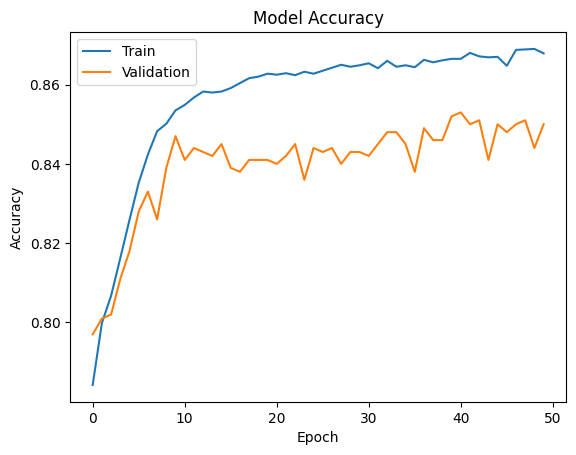

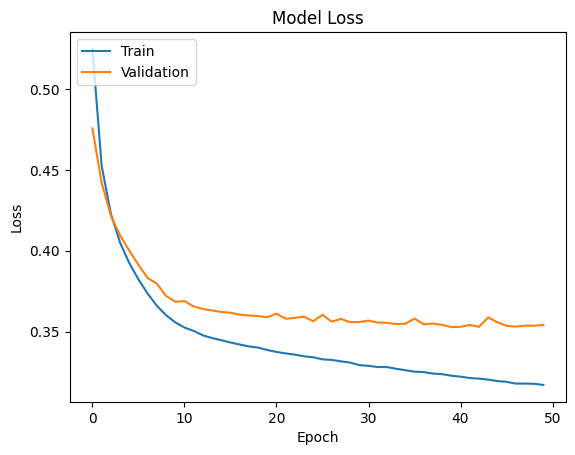

In [ ]:
# Ploting training & validation accuracy values
plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Ploting training & validation loss values
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
# Defining the model with the corrected input shape to reflect the preprocessed data
model_adam = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Adding a Dropout layer to help reduce overfitting
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model with Adam optimizer
model_adam.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Starting timing
start_time = time.time()

# Training the model for 50 epochs and use the actual validation data
train_hist_adam = model_adam.fit(X_train_scaled, y_train, epochs=50,batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

# Ending timing
end_time = time.time()

# Calculating and print the training duration
print(f"Training took {end_time - start_time:.2f} seconds")

# Using the preprocessed test dataset for predictions
y_pred = (model_adam.predict(X_test_scaled) > 0.5).astype(int)

# Evaluating performance using the actual test labels
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

print(metrics)

Epoch 1/50
250/250 [==============================] - 3s 4ms/step - loss: 0.4424 - accuracy: 0.8139 - val_loss: 0.3984 - val_accuracy: 0.8210
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8474 - val_loss: 0.3649 - val_accuracy: 0.8430
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3598 - accuracy: 0.8574 - val_loss: 0.3655 - val_accuracy: 0.8420
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8597 - val_loss: 0.3720 - val_accuracy: 0.8430
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8601 - val_loss: 0.3554 - val_accuracy: 0.8460
Epoch 6/50
250/250 [==============================] - 1s 5ms/step - loss: 0.3436 - accuracy: 0.8627 - val_loss: 0.3598 - val_accuracy: 0.8450
Epoch 7/50
250/250 [==============================] - 1s 5ms/step - loss: 0.3409 - accuracy: 0.8620 - val_loss: 0.3567 - val_accuracy: 0.8530
Epoch 

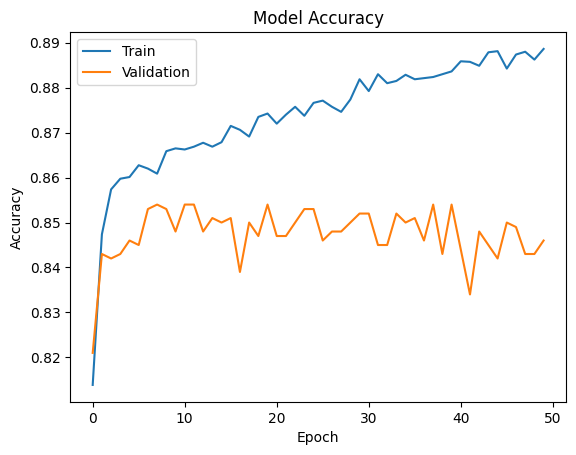

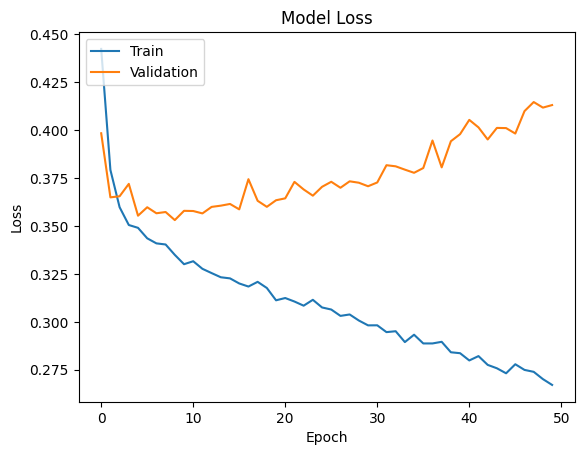

In [ ]:
# Ploting training & validation accuracy values
plt.plot(train_hist_adam.history['accuracy'])
plt.plot(train_hist_adam.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Ploting training & validation loss values
plt.plot(train_hist_adam.history['loss'])
plt.plot(train_hist_adam.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Neural Network with Adam Optimizer and Dropout

In [ ]:
# Defining the model with dropout layers for regularization
model_adam_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Dropout after the first hidden layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout after the second hidden layer
    Dense(32, activation='relu'),  # Additional dense layer without dropout
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compiling the model with Adam optimizer and a learning rate of 0.001
model_adam_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Timing the training process
start_time = time.time()
hist_adam_dropout = model_adam_dropout.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)
end_time = time.time()

# Training time calculation
train_time_adam_dropout = end_time - start_time
print(f"Training time: {train_time_adam_dropout:.2f} seconds")

# Using  the preprocessed test dataset for predictions
y_pred = (model_adam_dropout.predict(X_test_scaled) > 0.5).astype(int)


# Evaluating performance using the actual test labels
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

print(metrics)

Epoch 1/50
250/250 [==============================] - 3s 7ms/step - loss: 0.4890 - accuracy: 0.7832 - val_loss: 0.4289 - val_accuracy: 0.8000
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4262 - accuracy: 0.8171 - val_loss: 0.3955 - val_accuracy: 0.8270
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8292 - val_loss: 0.3761 - val_accuracy: 0.8380
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3843 - accuracy: 0.8419 - val_loss: 0.3667 - val_accuracy: 0.8380
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3750 - accuracy: 0.8478 - val_loss: 0.3644 - val_accuracy: 0.8430
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8491 - val_loss: 0.3625 - val_accuracy: 0.8440
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8489 - val_loss: 0.3575 - val_accuracy: 0.8470
Epoch 

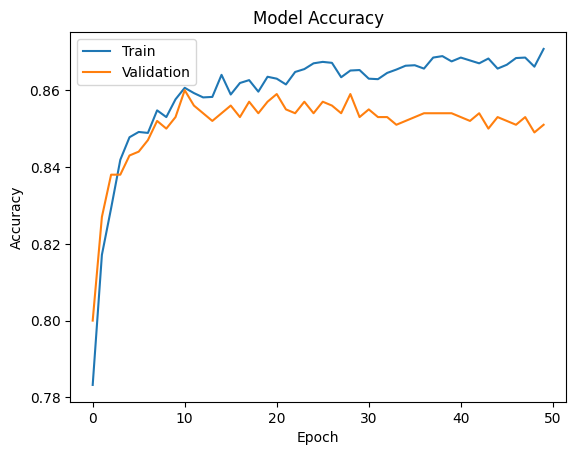

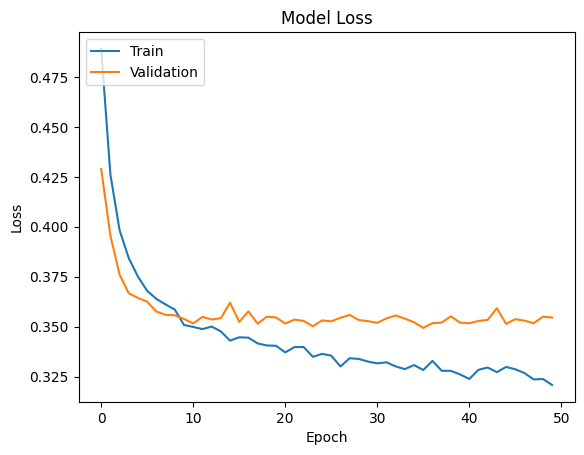

In [ ]:
# Plotting training & validation accuracy values
plt.plot(hist_adam_dropout.history['accuracy'])
plt.plot(hist_adam_dropout.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(hist_adam_dropout.history['loss'])
plt.plot(hist_adam_dropout.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Epoch 1/50
399/399 [==============================] - 2s 3ms/step - loss: 0.6387 - accuracy: 0.6748 - val_loss: 0.5835 - val_accuracy: 0.7080
Epoch 2/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5324 - accuracy: 0.7564 - val_loss: 0.5420 - val_accuracy: 0.7190
Epoch 3/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.7744 - val_loss: 0.4953 - val_accuracy: 0.7370
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4520 - accuracy: 0.7844 - val_loss: 0.4808 - val_accuracy: 0.7580
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4374 - accuracy: 0.7902 - val_loss: 0.4704 - val_accuracy: 0.7580
Epoch 6/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4279 - accuracy: 0.7981 - val_loss: 0.4691 - val_accuracy: 0.7590
Epoch 7/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4207 - accuracy: 0.8027 - val_loss: 0.4640 - val_accuracy: 0.7600
Epoch 

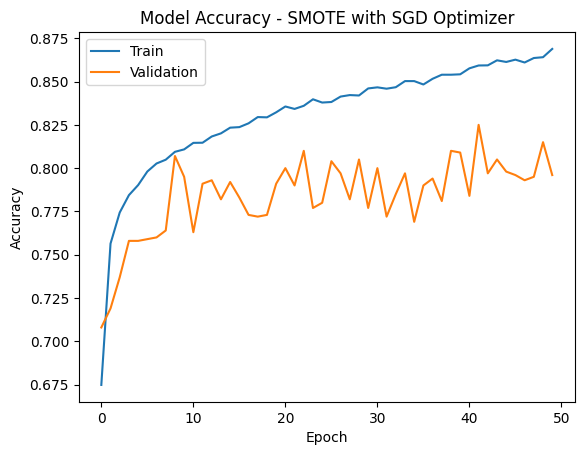

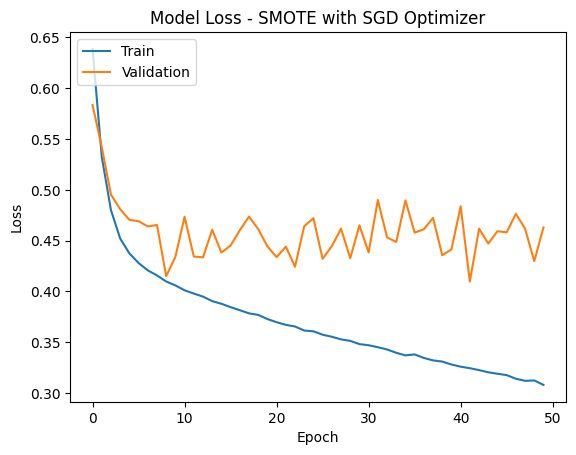

Training time: 55.41 seconds


In [ ]:
# Applying SMOTE
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Defining the model
model_smote_sgd = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model with SGD optimizer
model_smote_sgd.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
start_time = time.time()
hist_smote_sgd = model_smote_sgd.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)
end_time = time.time()

# Using the preprocessed test dataset for predictions
y_pred = (model_smote_sgd.predict(X_test_scaled) > 0.5).astype(int)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

print(metrics)

# Plotting training & validation accuracy values
plt.plot(hist_smote_sgd.history['accuracy'])
plt.plot(hist_smote_sgd.history['val_accuracy'])
plt.title('Model Accuracy - SMOTE with SGD Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(hist_smote_sgd.history['loss'])
plt.plot(hist_smote_sgd.history['val_loss'])
plt.title('Model Loss - SMOTE with SGD Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print(f"Training time: {end_time - start_time:.2f} seconds")

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Epoch 1/50
399/399 [==============================] - 2s 3ms/step - loss: 0.4667 - accuracy: 0.7767 - val_loss: 0.4471 - val_accuracy: 0.7800
Epoch 2/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8097 - val_loss: 0.4689 - val_accuracy: 0.7680
Epoch 3/50
399/399 [==============================] - 1s 3ms/step - loss: 0.3935 - accuracy: 0.8208 - val_loss: 0.4466 - val_accuracy: 0.7970
Epoch 4/50
399/399 [==============================] - 1s 3ms/step - loss: 0.3768 - accuracy: 0.8315 - val_loss: 0.5009 - val_accuracy: 0.7570
Epoch 5/50
399/399 [==============================] - 1s 3ms/step - loss: 0.3641 - accuracy: 0.8353 - val_loss: 0.4955 - val_accuracy: 0.7810
Epoch 6/50
399/399 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8451 - val_loss: 0.5295 - val_accuracy: 0.7500
Epoch 7/50
399/399 [==============================] - 2s 4ms/step - loss: 0.3401 - accuracy: 0.8496 - val_loss: 0.5044 - val_accuracy: 0.7800
Epoch 

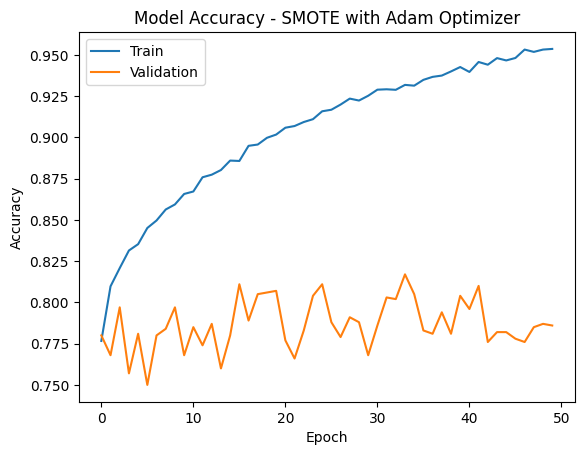

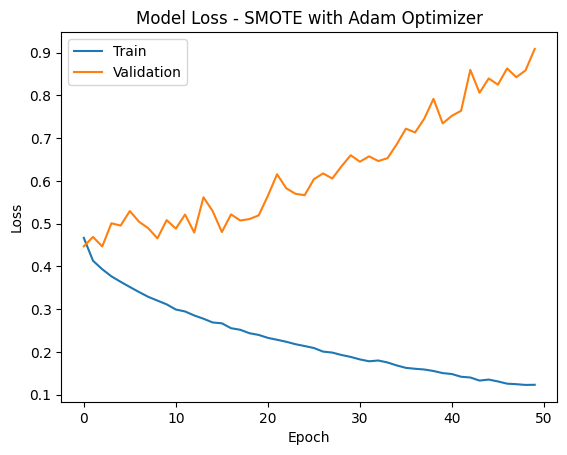

Training time: 60.90 seconds


In [ ]:
# Defining the model
model_smote_adam = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model with Adam optimizer
model_smote_adam.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
start_time = time.time()
hist_smote_adam = model_smote_adam.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)
end_time = time.time()

# Predictions and evaluation
y_pred = (model_smote_adam.predict(X_test_scaled) > 0.5).astype(int)
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
print(metrics)

# Plotting
plt.plot(hist_smote_adam.history['accuracy'])
plt.plot(hist_smote_adam.history['val_accuracy'])
plt.title('Model Accuracy - SMOTE with Adam Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist_smote_adam.history['loss'])
plt.plot(hist_smote_adam.history['val_loss'])
plt.title('Model Loss - SMOTE with Adam Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print(f"Training time: {end_time - start_time:.2f} seconds")

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Epoch 1/50
399/399 [==============================] - 3s 5ms/step - loss: 0.5668 - accuracy: 0.7130 - val_loss: 0.5150 - val_accuracy: 0.7390
Epoch 2/50
399/399 [==============================] - 2s 5ms/step - loss: 0.4867 - accuracy: 0.7716 - val_loss: 0.4443 - val_accuracy: 0.7800
Epoch 3/50
399/399 [==============================] - 2s 4ms/step - loss: 0.4601 - accuracy: 0.7825 - val_loss: 0.4719 - val_accuracy: 0.7710
Epoch 4/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4408 - accuracy: 0.7969 - val_loss: 0.4321 - val_accuracy: 0.7910
Epoch 5/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4323 - accuracy: 0.8012 - val_loss: 0.4429 - val_accuracy: 0.7880
Epoch 6/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.8019 - val_loss: 0.4564 - val_accuracy: 0.7790
Epoch 7/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.8057 - val_loss: 0.4422 - val_accuracy: 0.7860
Epoch 

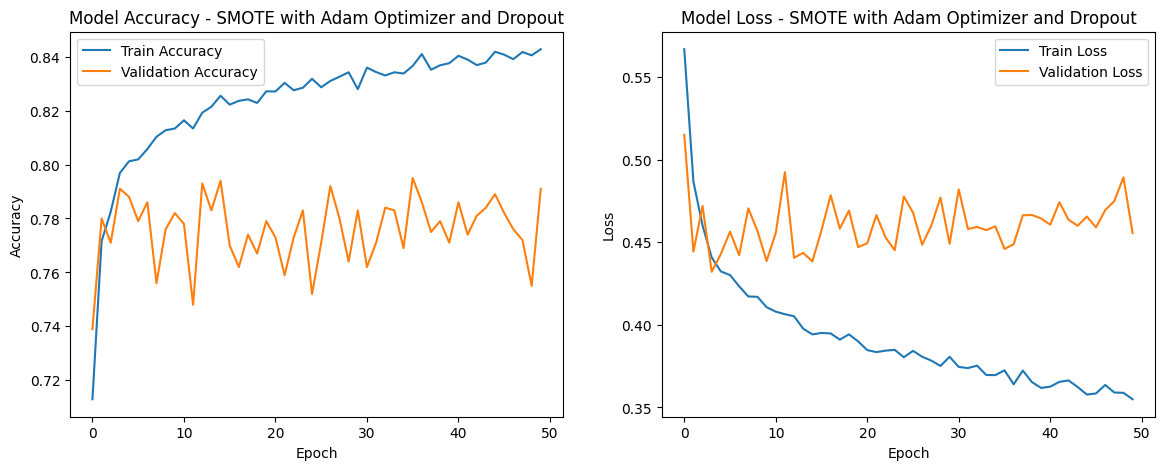

Training time: 83.11 seconds


In [ ]:
# Modeling definition with dropout layers for regularization
model_smote_adam_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling and train the model
model_smote_adam_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
start_time = time.time()
hist_smote_adam_dropout = model_smote_adam_dropout.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)
end_time = time.time()

# Predictions
y_pred = (model_smote_adam_dropout.predict(X_test_scaled) > 0.5).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist_smote_adam_dropout.history['accuracy'], label='Train Accuracy')
plt.plot(hist_smote_adam_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - SMOTE with Adam Optimizer and Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist_smote_adam_dropout.history['loss'], label='Train Loss')
plt.plot(hist_smote_adam_dropout.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - SMOTE with Adam Optimizer and Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Training time
print(f"Training time: {end_time - start_time:.2f} seconds")


## Model Performance Comparison and Final Model Selection

In [ ]:
# Creating a DataFrame to hold the summary of all models
models_summary = pd.DataFrame(columns=[
    'Model Description',
    'Optimizer',
    'Learning Rate',
    'Dropout Rate',
    'Epochs',
    'Batch Size',
    'Training Time (seconds)',
    'Accuracy',
    'Precision',
    'Recall',
    'F1 Score'
])

# Function to add a row of results to the models_summary DataFrame
def add_model_summary(row):
    global models_summary
    models_summary = models_summary.append(row, ignore_index=True)

# Model 1: SGD without Dropout
add_model_summary({
    'Model Description': 'SGD without Dropout',
    'Optimizer': 'SGD',
    'Learning Rate': 0.001,
    'Dropout Rate': 'N/A',
    'Epochs': 50,
    'Batch Size': 32,
    'Training Time (seconds)': 41.61,
    'Accuracy': 0.86,
    'Precision': 0.81,
    'Recall': 0.45,
    'F1 Score': 0.58
})

# Model 2: Adam without Dropout
add_model_summary({
    'Model Description': 'Adam without Dropout',
    'Optimizer': 'Adam',
    'Learning Rate': 0.001,
    'Dropout Rate': 'N/A',
    'Epochs': 50,
    'Batch Size': 32,
    'Training Time (seconds)': 83.77,
    'Accuracy': 0.87,
    'Precision': 0.78,
    'Recall': 0.51,
    'F1 Score': 0.62
})

# Model 3: Adam with Dropout
add_model_summary({
    'Model Description': 'Adam with Dropout',
    'Optimizer': 'Adam',
    'Learning Rate': 0.001,
    'Dropout Rate': 0.5,
    'Epochs': 50,
    'Batch Size': 32,
    'Training Time (seconds)': 83.43,
    'Accuracy': 0.87,
    'Precision': 0.88,
    'Recall': 0.46,
    'F1 Score': 0.61
})

# Model 4: SGD with Balanced Data (SMOTE) without Dropout
add_model_summary({
    'Model Description': 'SGD with Balanced Data (SMOTE) without Dropout',
    'Optimizer': 'SGD',
    'Learning Rate': 0.001,
    'Dropout Rate': 'N/A',
    'Epochs': 50,
    'Batch Size': 32,
    'Training Time (seconds)': 55.41,
    'Accuracy': 0.81,
    'Precision': 0.54,
    'Recall': 0.70,
    'F1 Score': 0.61
})

# Model 5: Adam with Balanced Data (SMOTE) without Dropout
add_model_summary({
    'Model Description': 'Adam with Balanced Data (SMOTE) without Dropout',
    'Optimizer': 'Adam',
    'Learning Rate': 0.001,
    'Dropout Rate': 'N/A',
    'Epochs': 50,
    'Batch Size': 32,
    'Training Time (seconds)':60.90,
    'Accuracy': 0.81,
    'Precision': 0.55,
    'Recall': 0.57,
    'F1 Score': 0.56
})

# Model 6:  Adam with Balanced Data (SMOTE) with Dropout
add_model_summary({
    'Model Description': 'Adam with Balanced Data (SMOTE) with Dropout',
    'Optimizer': 'Adam',
    'Learning Rate': 0.001,
    'Dropout Rate': '0.5',
    'Epochs': 50,
    'Batch Size': 32,
    'Training Time (seconds)': 83.11,
    'Accuracy': 0.81,
    'Precision': 0.55,
    'Recall': 0.69,
    'F1 Score': 0.61
})

# Displaying the summary DataFrame
models_summary

<ipython-input-4-bcad2216ec90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append(row, ignore_index=True)
<ipython-input-4-bcad2216ec90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append(row, ignore_index=True)
<ipython-input-4-bcad2216ec90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append(row, ignore_index=True)
<ipython-input-4-bcad2216ec90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append(row, ignore_index=True)
<ipython-input-4-bcad2216ec90>:19: FutureWarning: The frame.append m

,Model Description,Optimizer,Learning Rate,Dropout Rate,Epochs,Batch Size,Training Time (seconds),Accuracy,Precision,Recall,F1 Score
0,SGD without Dropout,SGD,0.001,N/A,50,32,41.61,0.86,0.81,0.45,0.58
1,Adam without Dropout,Adam,0.001,N/A,50,32,83.77,0.87,0.78,0.51,0.62
2,Adam with Dropout,Adam,0.001,0.5,50,32,83.43,0.87,0.88,0.46,0.61
3,SGD with Balanced Data (SMOTE) without Dropout,SGD,0.001,N/A,50,32,55.41,0.81,0.54,0.70,0.61
4,Adam with Balanced Data (SMOTE) without Dropout,Adam,0.001,N/A,50,32,60.90,0.81,0.55,0.57,0.56
5,Adam with Balanced Data (SMOTE) with Dropout,Adam,0.001,0.5,50,32,83.11,0.81,0.55,0.69,0.61


- Based on the results of each model against validation data and focus on recall as the primary metric, SGD with Balanced Data (SMOTE) without Dropout appears to be the model of choice. Although we see a decline in precision and accuracy compared to other models without SMOTE, recall had increased significantly in comparison. In addition, SGD with Balanced Data (SMOTE) without Dropout	is the 2nd most efficent model with a time of 55.41 seconds in training.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer on Test Data

Epoch 1/50
399/399 [==============================] - 2s 4ms/step - loss: 0.6336 - accuracy: 0.6826 - val_loss: 0.5373 - val_accuracy: 0.7790
Epoch 2/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5315 - accuracy: 0.7593 - val_loss: 0.5181 - val_accuracy: 0.7590
Epoch 3/50
399/399 [==============================] - 1s 4ms/step - loss: 0.4801 - accuracy: 0.7781 - val_loss: 0.4569 - val_accuracy: 0.7890
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4505 - accuracy: 0.7911 - val_loss: 0.4597 - val_accuracy: 0.7820
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4349 - accuracy: 0.7943 - val_loss: 0.4212 - val_accuracy: 0.8030
Epoch 6/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.8008 - val_loss: 0.4180 - val_accuracy: 0.8060
Epoch 7/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.8050 - val_loss: 0.4311 - val_accuracy: 0.7980
Epoch 

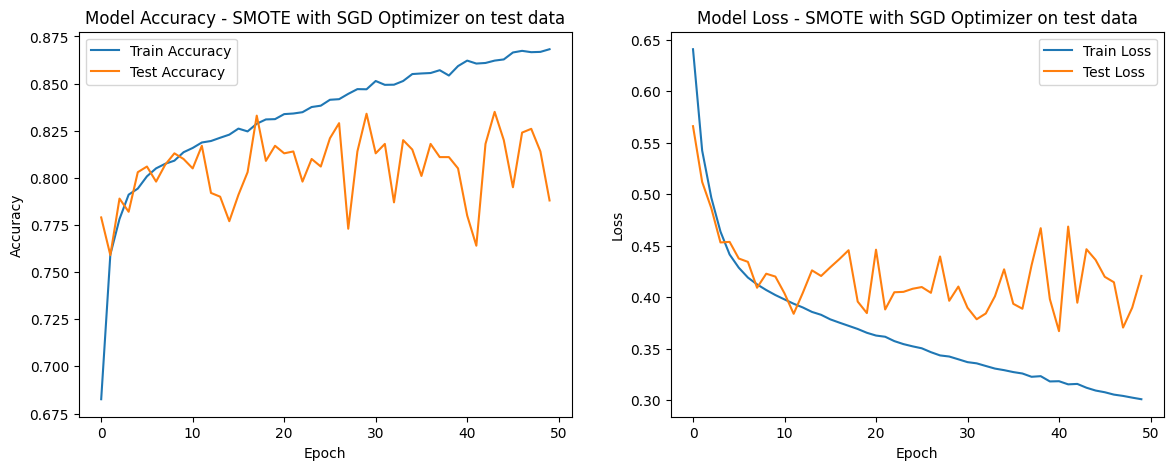

In [ ]:
# Applying SMOTE to balance the training set
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Defining the model
model_smote_sgd_final = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model with the SGD optimizer
model_smote_sgd_final.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and saving the history
start_time = time.time()
hist_final = model_smote_sgd_final.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)
end_time = time.time()

# Predictions on test set
y_pred = (model_smote_sgd_final.predict(X_test_scaled) > 0.5).astype("int32")

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing out the metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Plotting
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist_final.history['accuracy'], label='Train Accuracy')
plt.plot(hist_final.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy - SMOTE with SGD Optimizer on test data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss - SMOTE with SGD Optimizer on test data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Neural Network with Balanced Data (by applying SMOTE), SGD Optimizer, and Dropout on Test Data

Epoch 1/50
399/399 [==============================] - 2s 3ms/step - loss: 0.6964 - accuracy: 0.5278 - val_loss: 0.6497 - val_accuracy: 0.6820
Epoch 2/50
399/399 [==============================] - 1s 3ms/step - loss: 0.6501 - accuracy: 0.6159 - val_loss: 0.5810 - val_accuracy: 0.7350
Epoch 3/50
399/399 [==============================] - 1s 3ms/step - loss: 0.6059 - accuracy: 0.6816 - val_loss: 0.5454 - val_accuracy: 0.7350
Epoch 4/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5820 - accuracy: 0.7041 - val_loss: 0.5367 - val_accuracy: 0.7380
Epoch 5/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5674 - accuracy: 0.7209 - val_loss: 0.5133 - val_accuracy: 0.7440
Epoch 6/50
399/399 [==============================] - 2s 4ms/step - loss: 0.5552 - accuracy: 0.7272 - val_loss: 0.5100 - val_accuracy: 0.7490
Epoch 7/50
399/399 [==============================] - 2s 4ms/step - loss: 0.5431 - accuracy: 0.7355 - val_loss: 0.4947 - val_accuracy: 0.7590
Epoch 

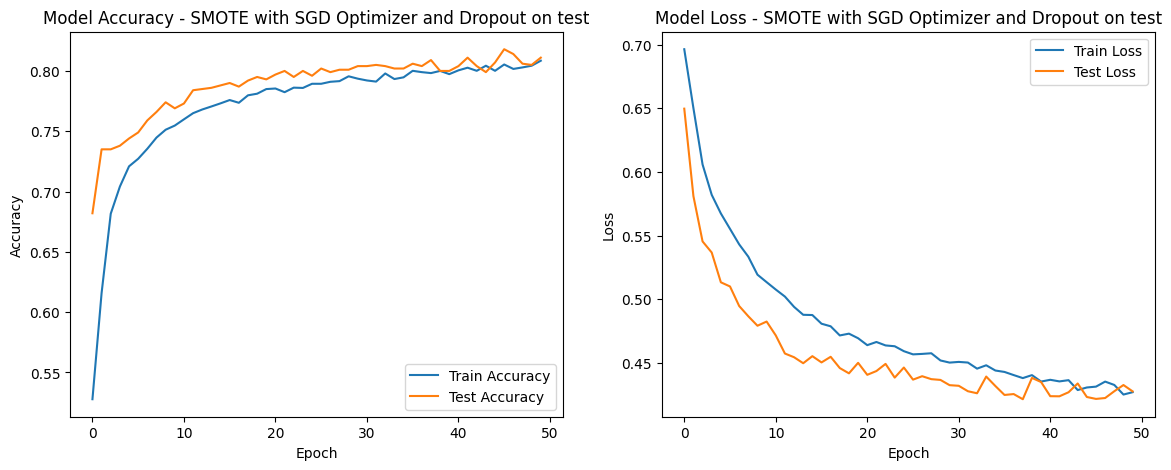

In [ ]:
# Applying SMOTE to balance the training set
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


# Defining the model with dropout layers
model_smote_sgd_dropout_final = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.5),  # Dropout layer after the first Dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout layer after the second Dense layer
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model with the SGD optimizer
model_smote_sgd_dropout_final.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and saving the history
start_time = time.time()
hist_test_dropout = model_smote_sgd_dropout_final.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)
end_time = time.time()

# Predictions on test set
y_pred = (model_smote_sgd_dropout_final.predict(X_test_scaled) > 0.5).astype("int32")

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing out the metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Plotting
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist_test_dropout.history['accuracy'], label='Train Accuracy')
plt.plot(hist_test_dropout.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy - SMOTE with SGD Optimizer and Dropout on test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist_test_dropout.history['loss'], label='Train Loss')
plt.plot(hist_test_dropout.history['val_loss'], label='Test Loss')
plt.title('Model Loss - SMOTE with SGD Optimizer and Dropout on test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:


# Model tested with balanced data using SMOTE on test data
add_model_summary({
    'Model Description': 'Balanced Data (SMOTE) + SGD on Test Data',
    'Optimizer': 'SGD',
    'Learning Rate': 0.001,
    'Dropout Rate': 'N/A',
    'Epochs': 50,
    'Batch Size': 32,
    'Training Time (seconds)': 73.20,
    'Accuracy': 0.79,
    'Precision': 0.50,
    'Recall': 0.75,
    'F1 Score': 0.60
})

# Model with balanced data (SMOTE), SGD optimizer, and dropout tested on test data
add_model_summary({
    'Model Description': 'Balanced Data (SMOTE) + SGD + Dropout on Test Data',
    'Optimizer': 'SGD',
    'Learning Rate': 0.001,
    'Dropout Rate': 0.5,
    'Epochs': 50,
    'Batch Size': 32,
    'Training Time (seconds)': 82.75,
    'Accuracy': 0.81,
    'Precision': 0.54,
    'Recall': 0.62,
    'F1 Score': 0.60
})

# Displaying the updated summary DataFrame
models_summary


<ipython-input-4-bcad2216ec90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append(row, ignore_index=True)
<ipython-input-4-bcad2216ec90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_summary = models_summary.append(row, ignore_index=True)


,Model Description,Optimizer,Learning Rate,Dropout Rate,Epochs,Batch Size,Training Time (seconds),Accuracy,Precision,Recall,F1 Score
0,SGD without Dropout,SGD,0.001,N/A,50,32,41.61,0.86,0.81,0.45,0.58
1,Adam without Dropout,Adam,0.001,N/A,50,32,83.77,0.87,0.78,0.51,0.62
2,Adam with Dropout,Adam,0.001,0.5,50,32,83.43,0.87,0.88,0.46,0.61
3,SGD with Balanced Data (SMOTE) without Dropout,SGD,0.001,N/A,50,32,55.41,0.81,0.54,0.70,0.61
4,Adam with Balanced Data (SMOTE) without Dropout,Adam,0.001,N/A,50,32,60.90,0.81,0.55,0.57,0.56
5,Adam with Balanced Data (SMOTE) with Dropout,Adam,0.001,0.5,50,32,83.11,0.81,0.55,0.69,0.61
6,Balanced Data (SMOTE) + SGD on Test Data,SGD,0.001,N/A,50,32,73.20,0.79,0.50,0.75,0.60
7,Balanced Data (SMOTE) + SGD + Dropout on Test ...,SGD,0.001,0.5,50,32,82.75,0.81,0.54,0.62,0.60


- Balanced Data (SMOTE) + SGD was ran on the test data, and we found that there was an increase in recall by approximately 0.05, although precision had a slight decrease. This finding helps ensures that the model can perform consistently by applying to two separate data sets (Test and Validation).
- We had also attempted including dropout with this particular model, but findings did not bear fruit and recall was reduced.
- One important note to make is that the results of the models metrics are still not optimal. We will discuss this in more detail in the "Actionable Insights and Business Recommendations" section of this presentation.

## Actionable Insights and Business Recommendations

###**Strategy for Churn Reduction and Customer Growth Improvements:**

####**Geographic and Demographic Targeting:**

- Focus retention strategies to specific regions and age demographics initially, recognizing the unique needs of each group.
     - For regions like Germany with higher churn, localize service offerings and support. Simultaneously, address older demographics' preferences for security and personalized service, while drawing younger customers with digital innovations and engaging banking technology.

####**Improved Engagement Through Product Usage:**

- Boost customer interaction by encouraging a broader usage of products.
    - Personalized recommendations and rewards for using multiple services can pres customer relationships. Innovative engagement approaches, especially for younger demographics, could include financial education via apps and "gamified" banking experiences.

####**Data-Driven Retention and Experience Improvement:**

- Continued use and optimization of balanced datasets, neural networks, and other machine learning modeling approaches will provide further insights into designing proactive retention strategies focusing on customers identified at high risk of churn. Continuous refinement of the "customer experience", based on model predictions and customer feedback, is intrinsic to reducing churn.

- Explore alternative regularization methods and adjusting network architectures can uncover new pathways to enhanced model performance, specifically increasing the recall metric, and associated metrics for improved, predictive reliability.

####**Proactive Communication and Feedback Integration:**

- Develop communication strategies that resonate with at-risk customers, utilizing personalized messaging to strenghten relationships. Incorporate regular customer feedback to continuously improve and refine services, products, and customer interactions.

####**EDA Insights for Strategic Growth Summary:**
- Regional Customization: Implement region-specific campaigns and services that address the unique characteristics of customers in areas with high churn rates.

- Age-Specific Strategies: Utilize insights on age-related churn patterns to create targeted engagement strategies, making banking more relevant and appealing across demographics.

- Engagement-Driven Growth: Focus on strategies that not only retain customers but also actively promote customer loyalty and growth through engagement and product diversification.

####**Final Thoughts:**
By focusing on targeted retention initiatives, customer experience, personalized communication, and continuous adaptation of strategies, the bank can effectively manage churn. Furthermore, understanding geographic variations, age-related patterns, and engagement levels enables the development of more intuitive, effective strategies that cater to the diverse needs of the customer base, ensuring long-term success and profitability.

<font size=6 color='blue'>Power Ahead</font>
___